In [4]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), "src"))

import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
from data_generator import SimpleMultiViewDataGenerator
from evaluation import evaluate_and_log_model
import wandb
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint

from model_factory import build_model
np.random.seed(42)
tf.random.set_seed(42)

wandb.init(project="test")

In [5]:
from models.early_fusion.resnet50_early import StackReduceLayer
local_model_path = "/home/yammo/Downloads/model_best_frozen.keras"

model = tf.keras.models.load_model(local_model_path,
                                   custom_objects={"StackReduceLayer": StackReduceLayer})

Found 5 complete samples for categories: ['real_1']
Classification Report:
                 precision    recall  f1-score   support

         real_1       1.00      0.80      0.89         5
         real_2       0.00      0.00      0.00         0
         real_3       0.00      0.00      0.00         0
         real_4       0.00      0.00      0.00         0
         real_5       0.00      0.00      0.00         0
thingi10k_32770       0.00      0.00      0.00         0
thingi10k_34785       0.00      0.00      0.00         0
thingi10k_35269       0.00      0.00      0.00         0
thingi10k_36069       0.00      0.00      0.00         0
thingi10k_36082       0.00      0.00      0.00         0
thingi10k_36086       0.00      0.00      0.00         0
thingi10k_36090       0.00      0.00      0.00         0
thingi10k_36372       0.00      0.00      0.00         0
thingi10k_36373       0.00      0.00      0.00         0
thingi10k_37093       0.00      0.00      0.00         0
thingi10k_37

2025-03-23 19:12:08.299578: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


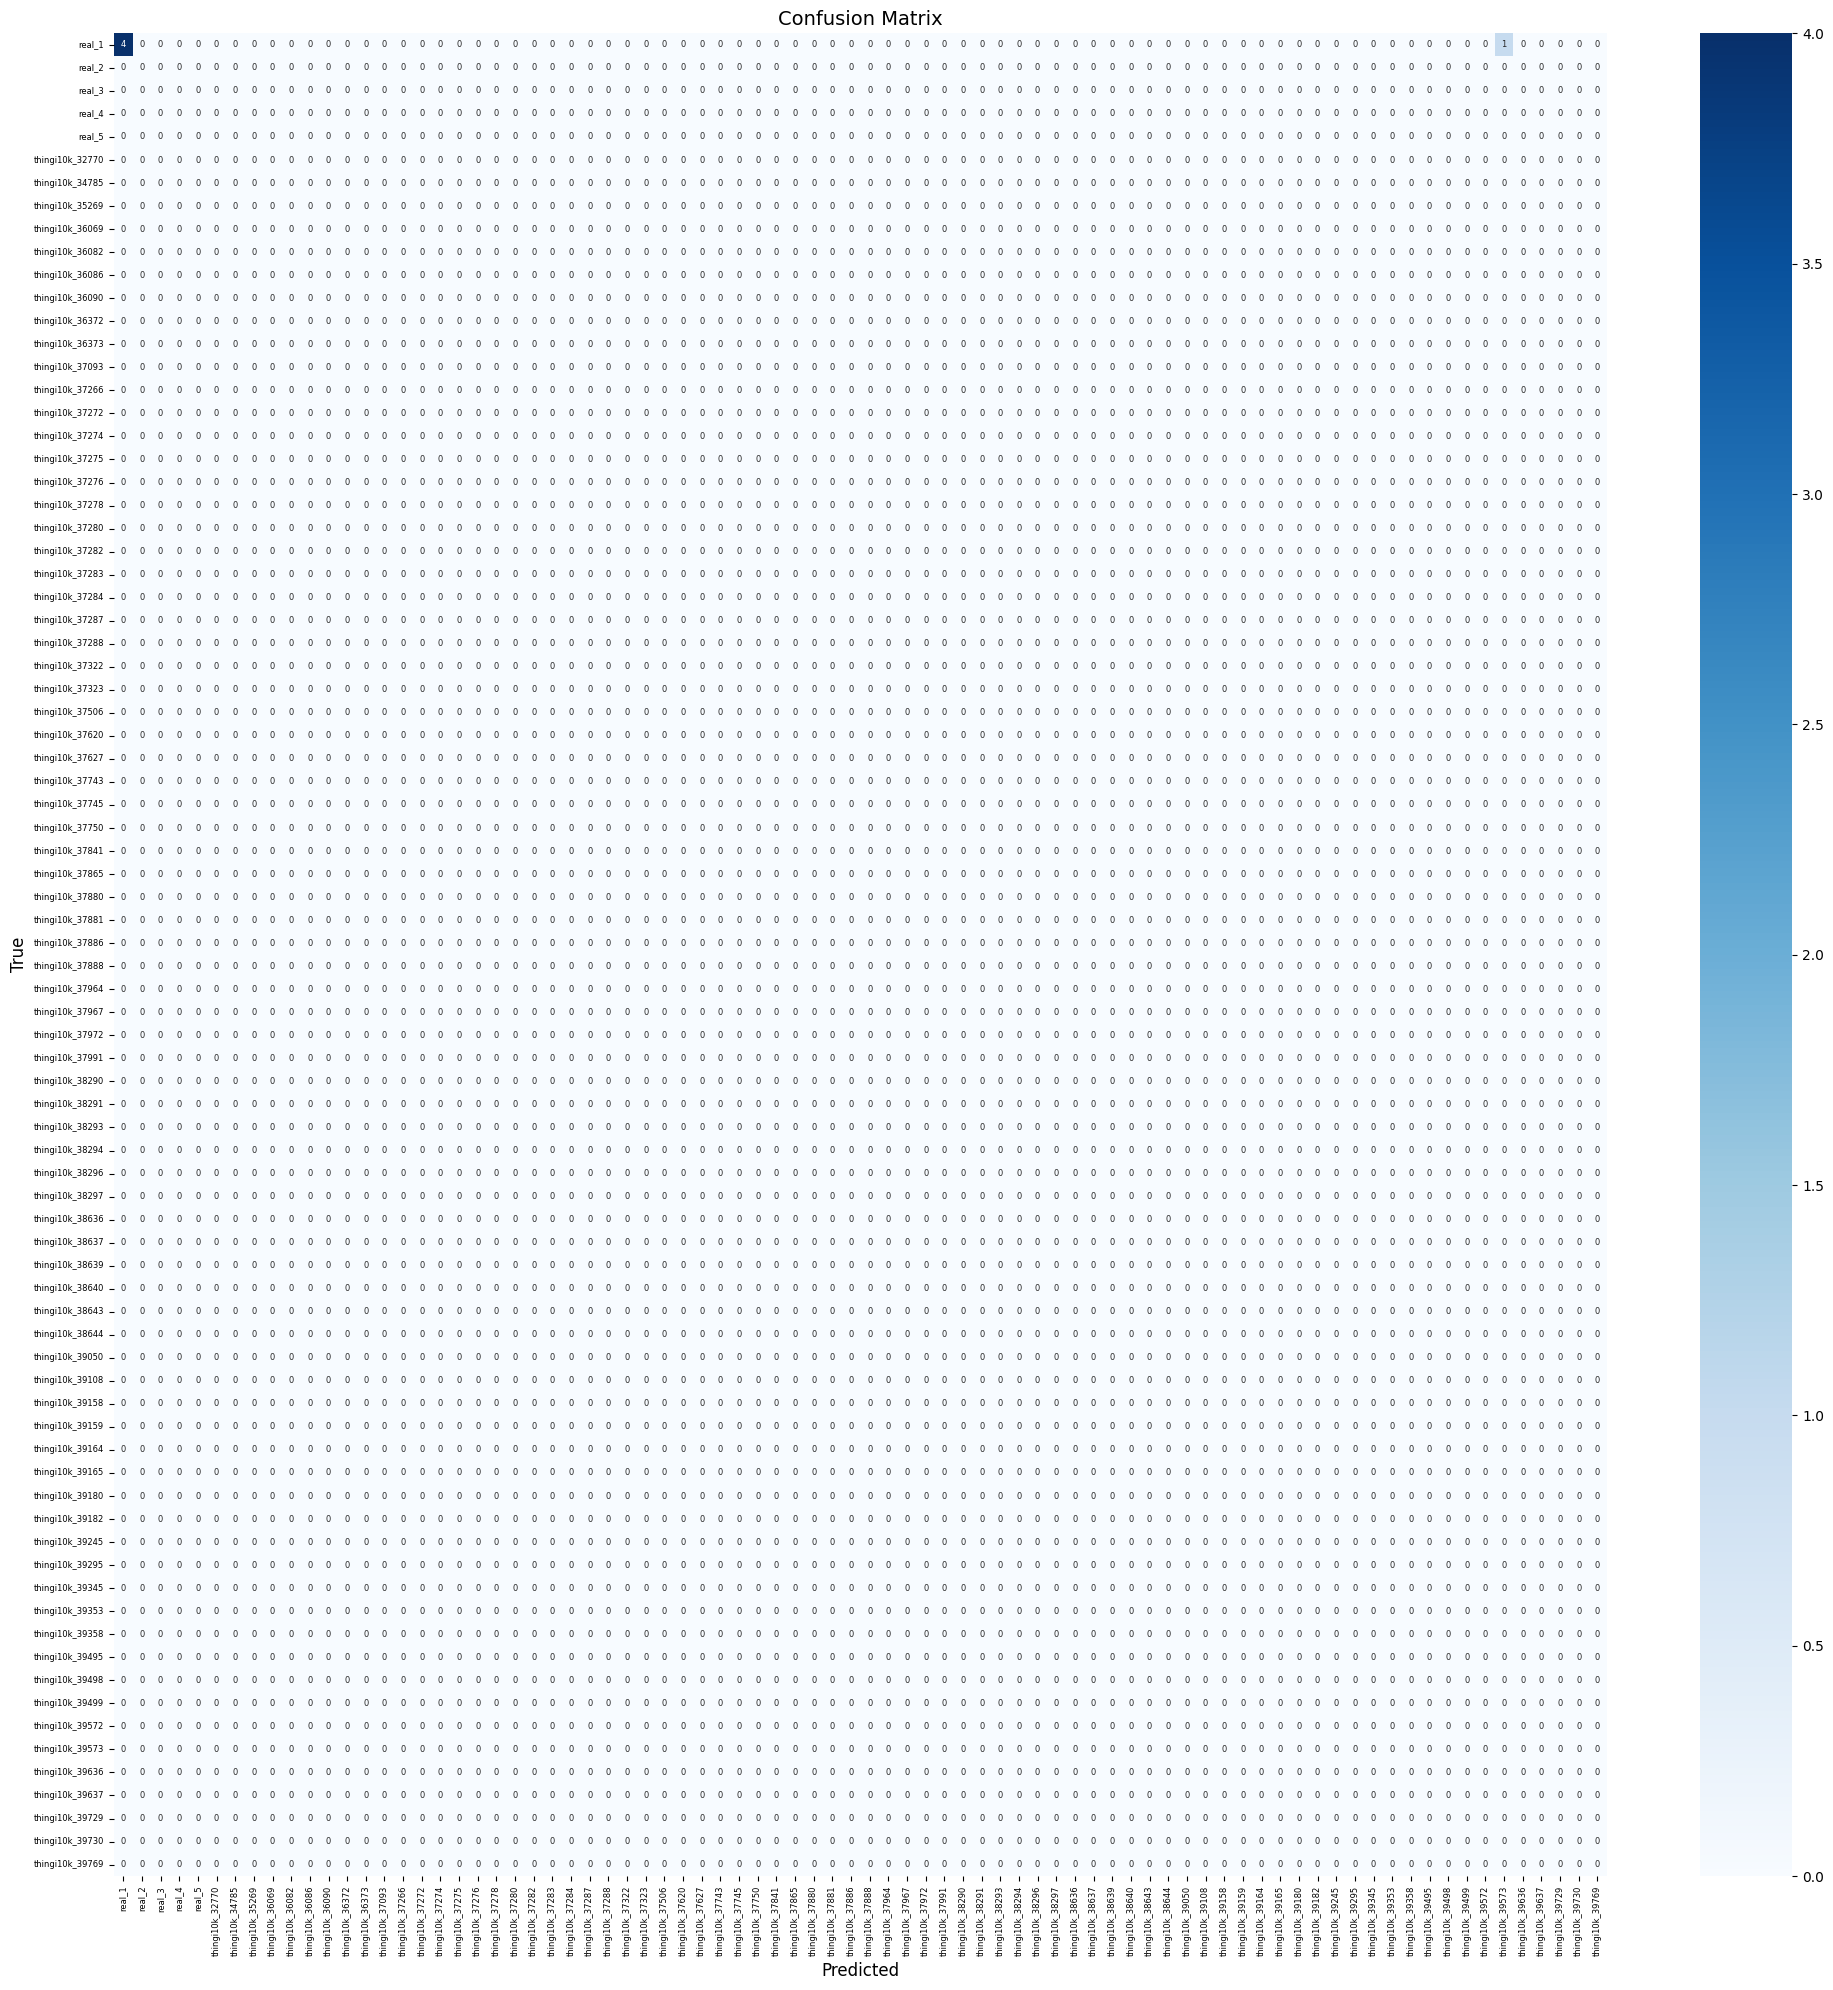

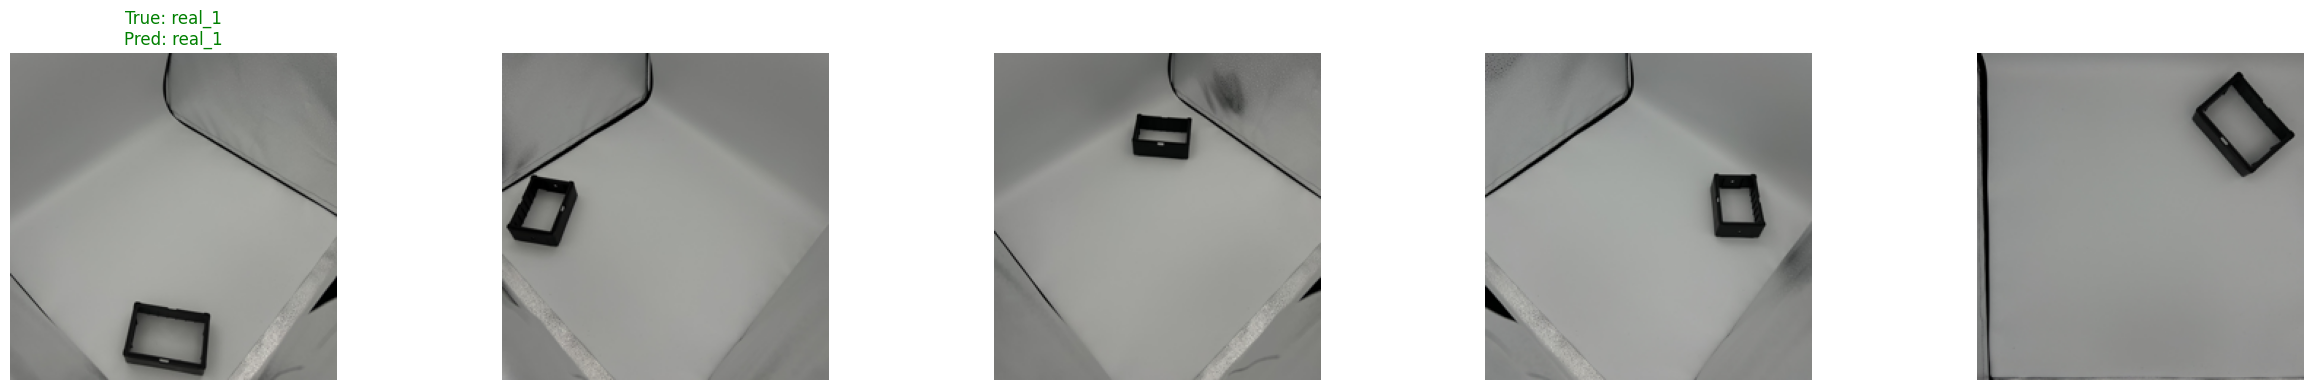

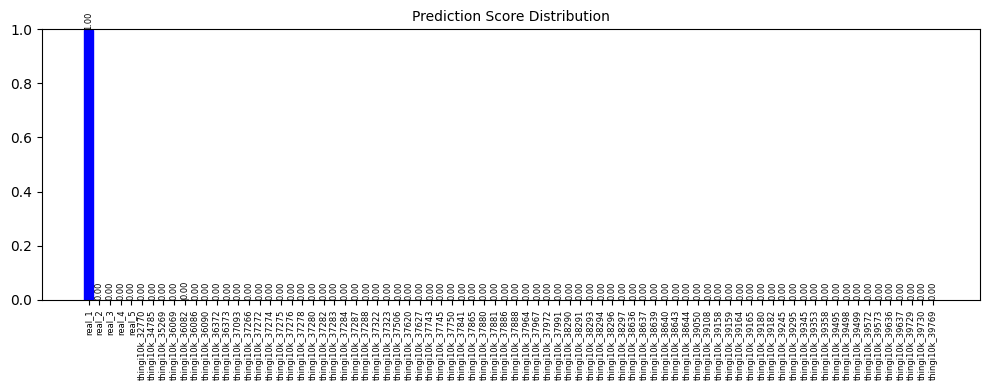

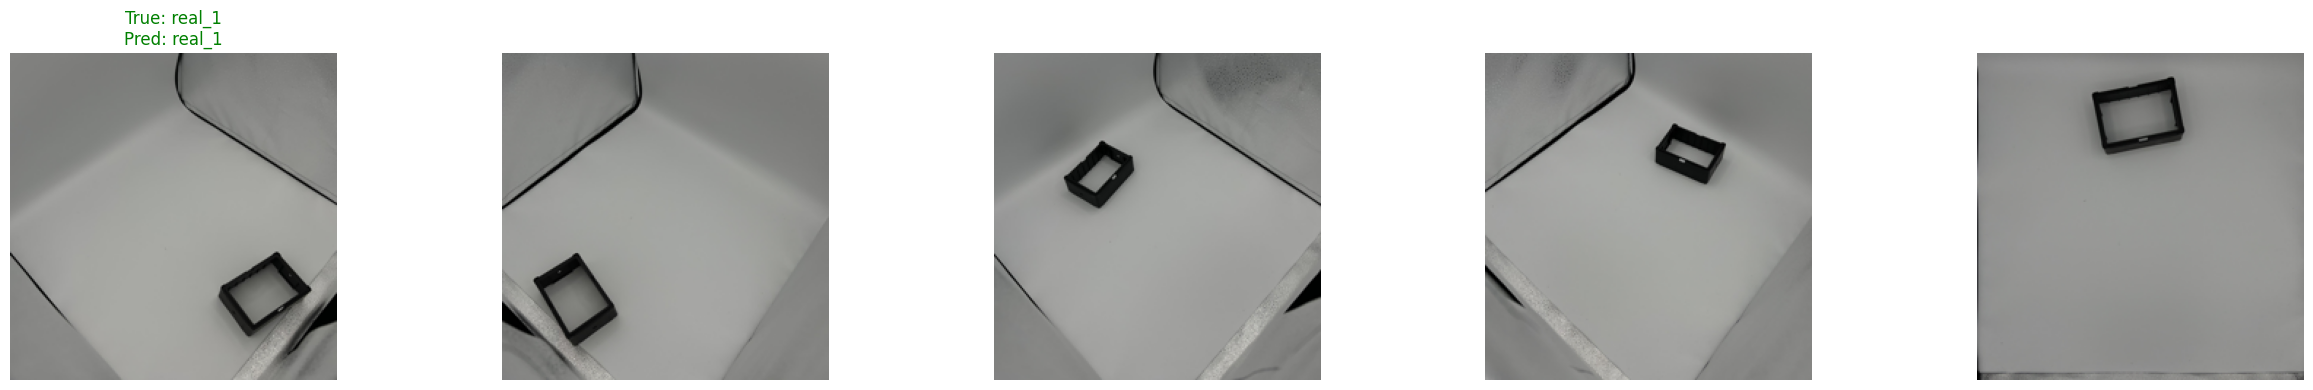

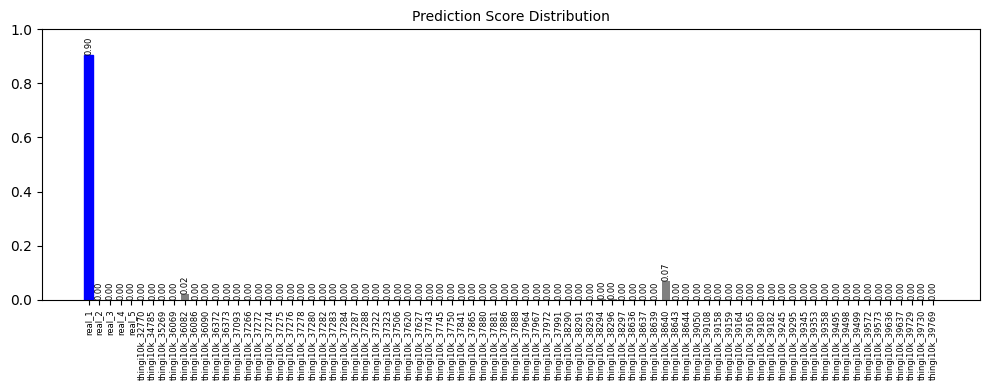

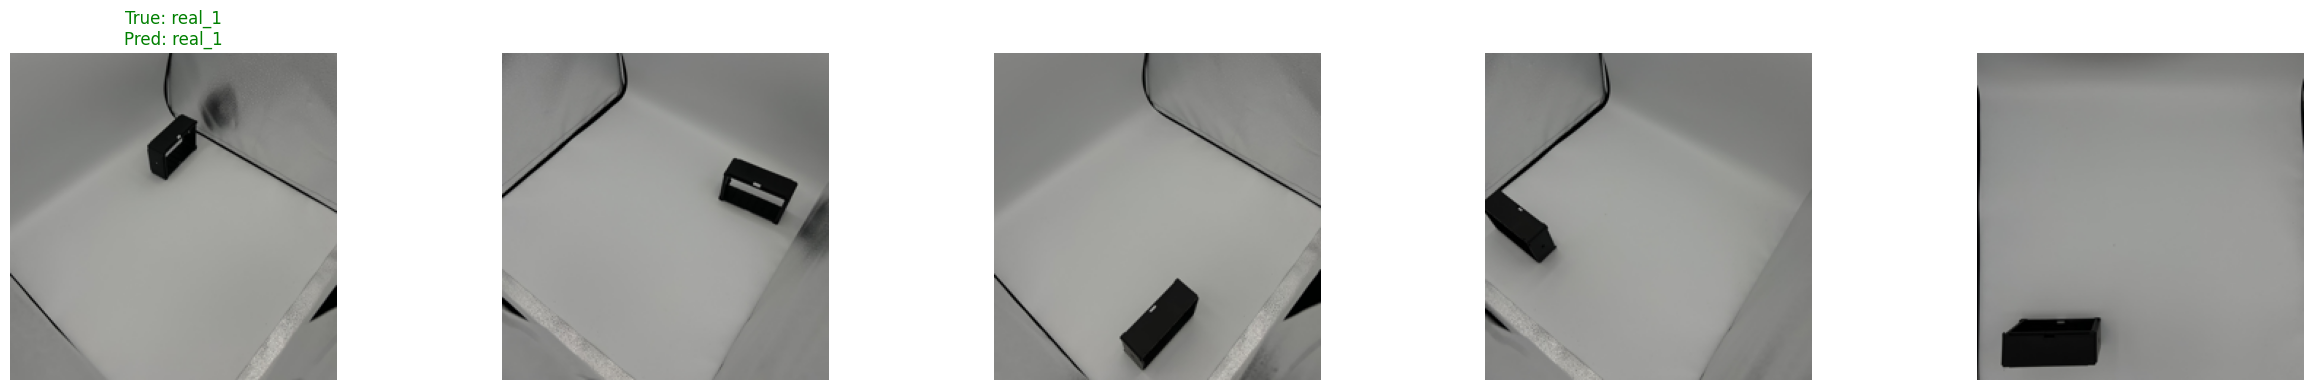

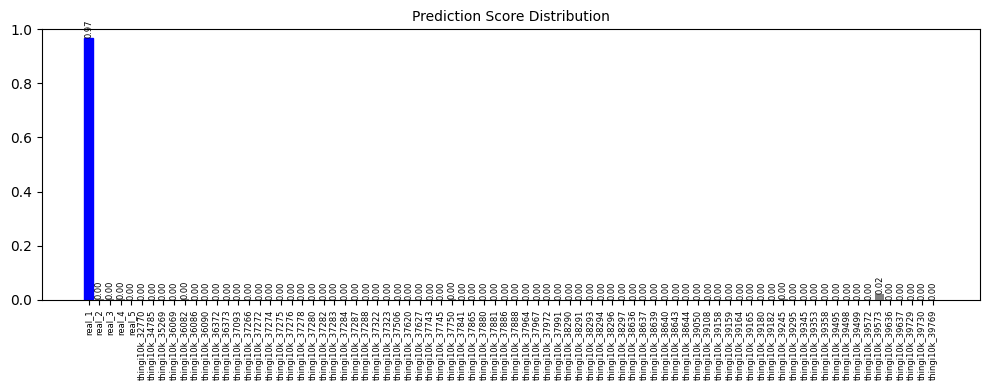

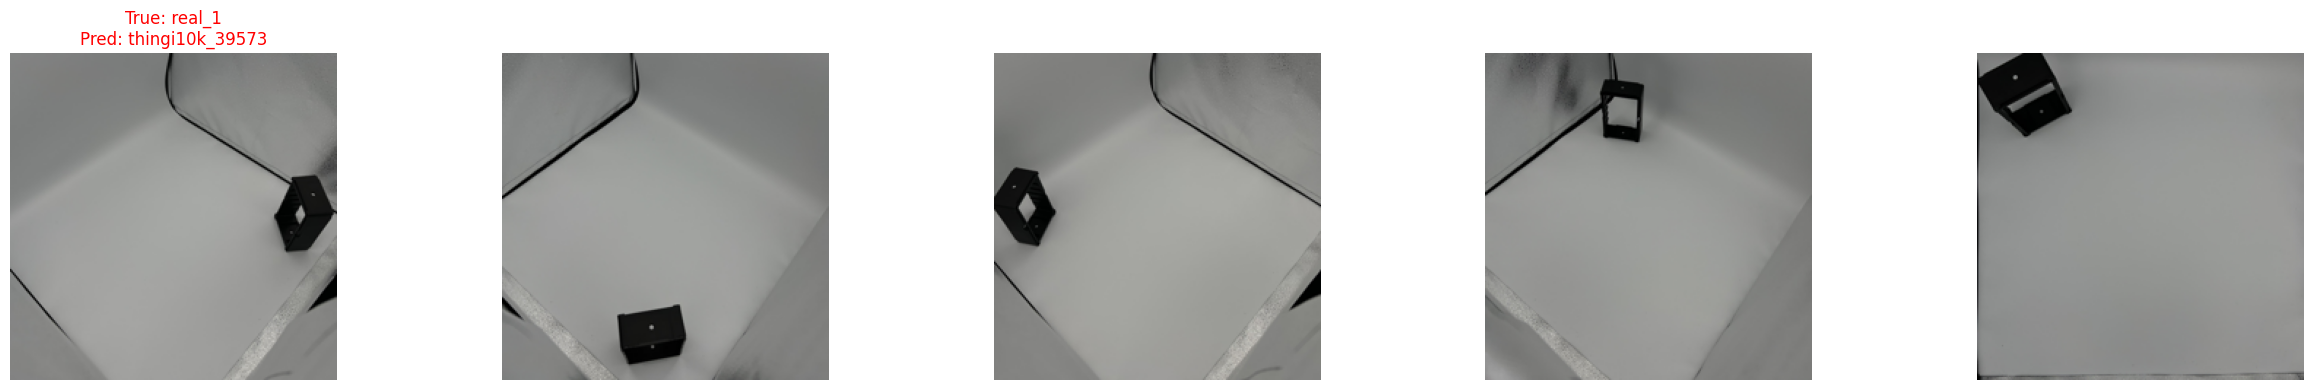

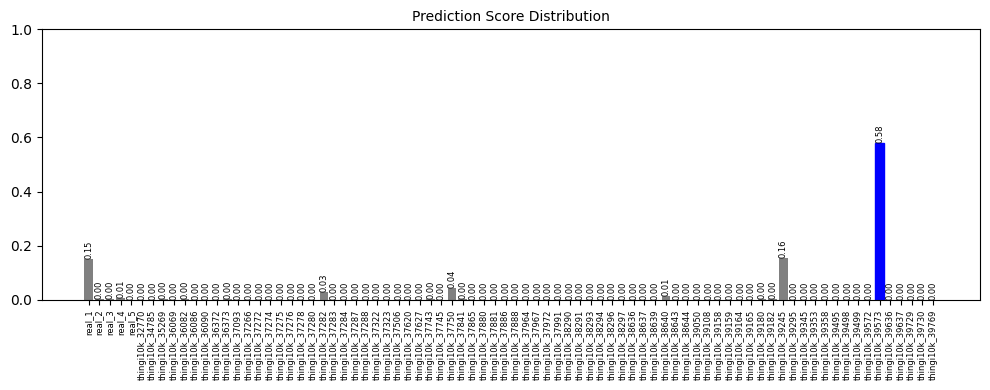

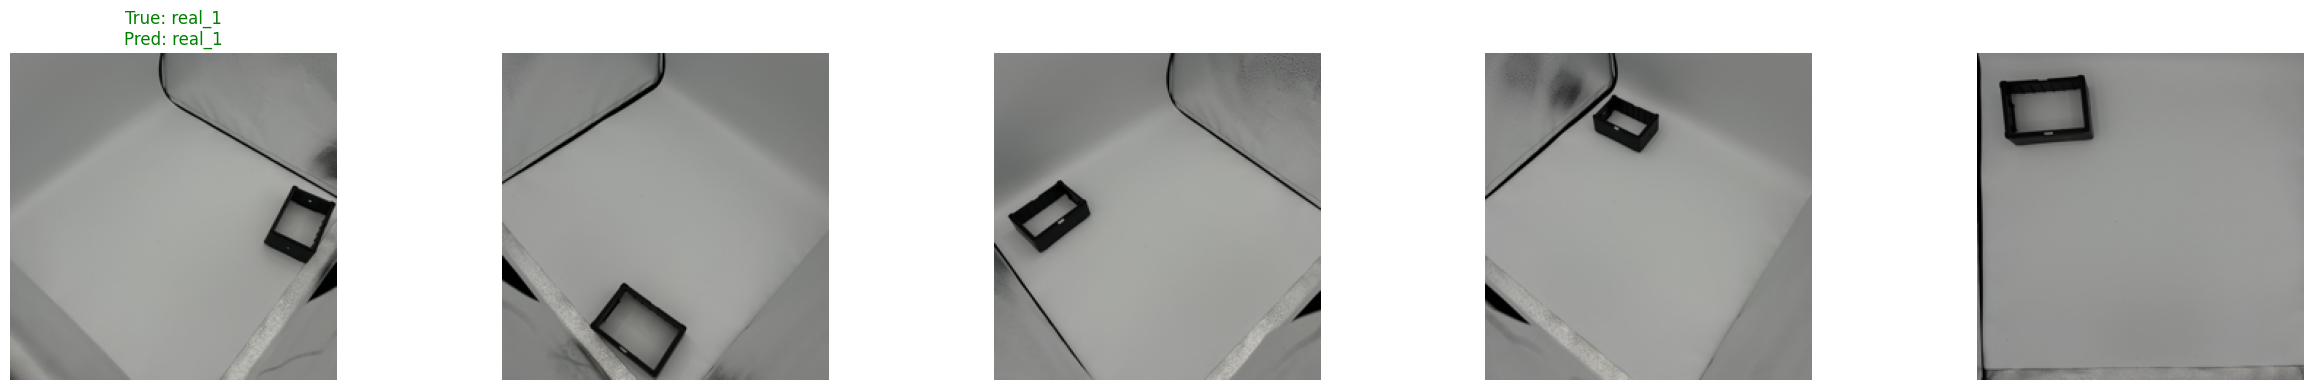

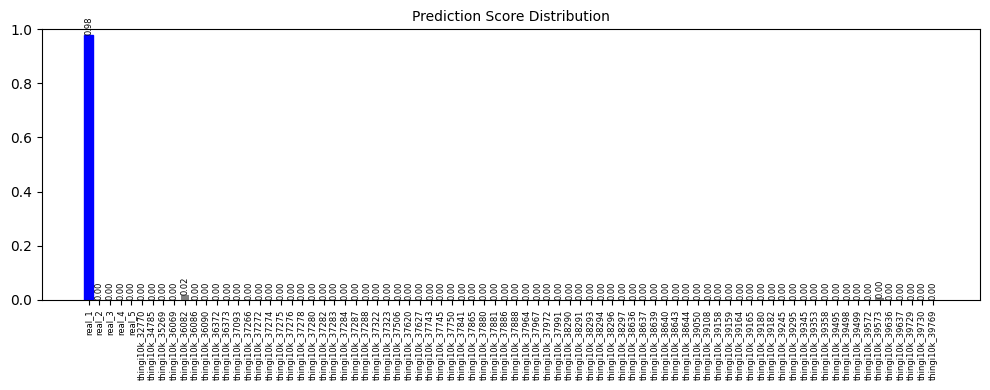

In [ ]:
# Define test dataset configuration.
# Make sure test_data_dir is a valid path on your system.
config = {
    "views": ["back_left", "back_right", "front_left", "front_right", "top"],
    "input_shape": (224, 224, 3),
    "batch_size": 16
}

views = ["back_left", "back_right", "front_left", "front_right", "top"]
class_names = ['real_1', 'real_2', 'real_3', 'real_4', 'real_5', 'thingi10k_32770', 'thingi10k_34785', 'thingi10k_35269', 'thingi10k_36069', 'thingi10k_36082', 'thingi10k_36086', 'thingi10k_36090', 'thingi10k_36372', 'thingi10k_36373', 'thingi10k_37093', 'thingi10k_37266', 'thingi10k_37272', 'thingi10k_37274', 'thingi10k_37275', 'thingi10k_37276', 'thingi10k_37278', 'thingi10k_37280', 'thingi10k_37282', 'thingi10k_37283', 'thingi10k_37284', 'thingi10k_37287', 'thingi10k_37288', 'thingi10k_37322', 'thingi10k_37323', 'thingi10k_37506', 'thingi10k_37620', 'thingi10k_37627', 'thingi10k_37743', 'thingi10k_37745', 'thingi10k_37750', 'thingi10k_37841', 'thingi10k_37865', 'thingi10k_37880', 'thingi10k_37881', 'thingi10k_37886', 'thingi10k_37888', 'thingi10k_37964', 'thingi10k_37967', 'thingi10k_37972', 'thingi10k_37991', 'thingi10k_38290', 'thingi10k_38291', 'thingi10k_38293', 'thingi10k_38294', 'thingi10k_38296', 'thingi10k_38297', 'thingi10k_38636', 'thingi10k_38637', 'thingi10k_38639', 'thingi10k_38640', 'thingi10k_38643', 'thingi10k_38644', 'thingi10k_39050', 'thingi10k_39108', 'thingi10k_39158', 'thingi10k_39159', 'thingi10k_39164', 'thingi10k_39165', 'thingi10k_39180', 'thingi10k_39182', 'thingi10k_39245', 'thingi10k_39295', 'thingi10k_39345', 'thingi10k_39353', 'thingi10k_39358', 'thingi10k_39495', 'thingi10k_39498', 'thingi10k_39499', 'thingi10k_39572', 'thingi10k_39573', 'thingi10k_39636', 'thingi10k_39637', 'thingi10k_39729', 'thingi10k_39730', 'thingi10k_39769']

# red_marker_label = "charging_brick"
# red_marker_dir = r"/home/yammo/Development/multi-view-classification/dataset/test_charging_brick"

label = "partial_occlusion"
dir = f"/home/yammo/Development/multi-view-classification/dataset/test_{label}"

# Set an output directory for evaluation results.
output_dir = "results/test_run"
os.makedirs(output_dir, exist_ok=True)

# Evaluate the model on the test dataset and log the results to wandb.

evaluate_and_log_model(model, output_dir, label, None, dir, config, class_names, None)